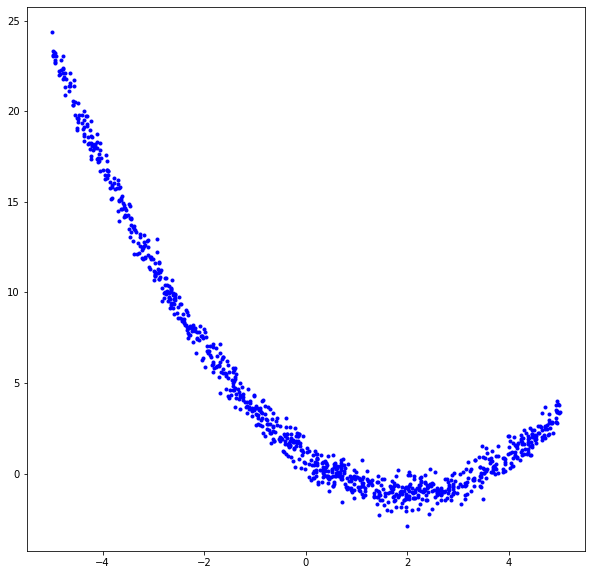

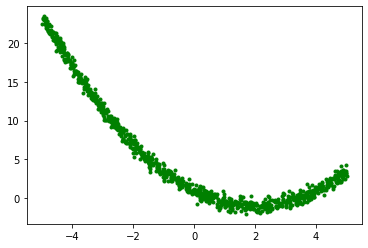

Batch Gradient-Descent Algorithm (alpha=1e-05)
a0: -19.11097740472952
a1: -20.236957751305585



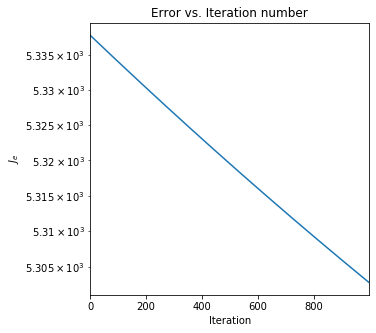

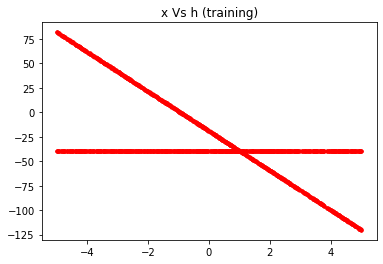

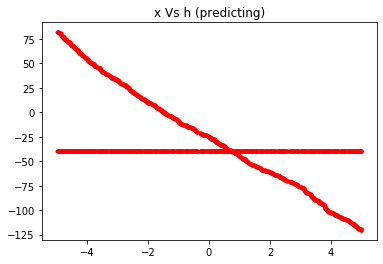

Batch Gradient-Descent Algorithm (alpha=0.0006)
a0: 14.213154255157976
a1: 14.213154255157976
a2: -35.7926814440304



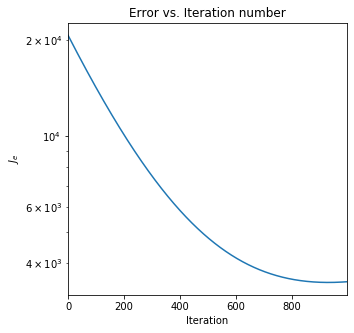

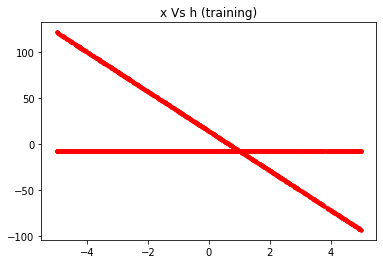

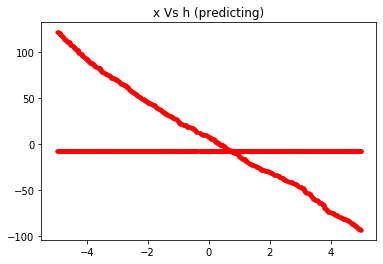

Batch Gradient-Descent Algorithm (alpha=0.0008)
a0: 13.737848567119993
a1: 13.737848567119993
a2: 13.737848567119993
a3: -42.03520667396928



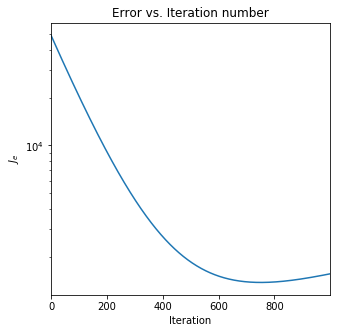

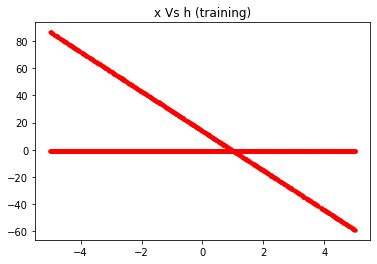

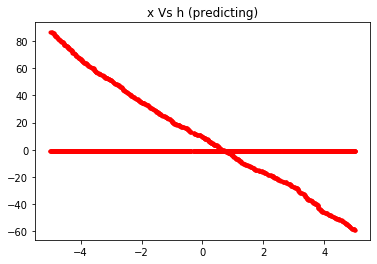

Batch Gradient-Descent Algorithm (alpha=0.0008)
a0: 10.77851618333562
a1: 10.77851618333562
a2: 10.77851618333562
a3: 10.77851618333562
a4: 10.77851618333562



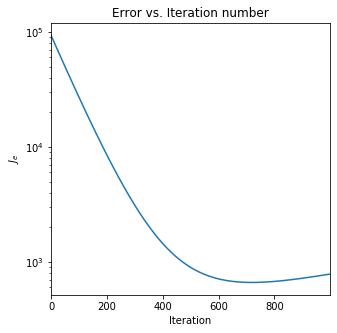

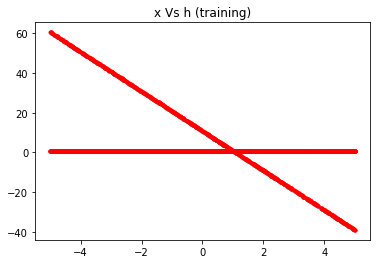

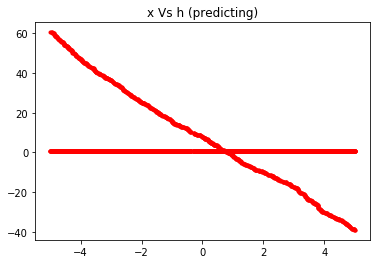

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import math

"""
Hypothesis Function
"""
def hypothesis(X, A0, A1, A2=None, A3=None, A4=None):
    h = A0 + A1*X
    if A4 != None:
        h = h + A2*X + A3*X + A4*X
    elif A3 != None:
        h = h + A2*X + A3*X
    elif A2 != None:
        h = h + A2*X
    return h
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X, y, M):
    # Closed-form solution.
    a = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    if X.shape[1] == 5:
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0], A2=a[2, 0], A3=a[3, 0], A4=a[4, 0])
    elif X.shape[1] == 4:
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0], A2=a[2, 0], A3=a[3, 0])
    elif X.shape[1] == 3:
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0], A2=a[2, 0])
    else:
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0])
    Joptimum = (1/M)*np.sum(np.power((y - h), 2))
    
    return Joptimum, a

"""
Batch gradient descent solution.
"""
def batchGradientDescent(alpha, n_iterations, X, y):
    # Random initialization of parameters.
    a = np.zeros((X.shape[1],1))
    # Create vector for parameter history.
    a_hist = np.zeros((X.shape[1], n_iterations+1))
   
    Jgd = np.zeros(n_iterations+1)
    if X.shape[1] == 5:
        a[0] = -20
        a[1] = -20
        a[2] = -20
        a[3] = -20
        a[4] = -20
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0], A2=a[2, 0], A3=a[3, 0], A4=a[4, 0])
        a_hist[0, 0] = a[0]
        a_hist[1, 0] = a[1]
        a_hist[2, 0] = a[2]
        a_hist[3, 0] = a[3]
        a_hist[4, 0] = a[4]
    elif X.shape[1] == 4:
        a[0] = -20
        a[1] = -20
        a[2] = -20
        a[3] = -20
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0], A2=a[2, 0], A3=a[3, 0])
        a_hist[0, 0] = a[0]
        a_hist[1, 0] = a[1]
        a_hist[2, 0] = a[2]
        a_hist[3, 0] = a[3]
    elif X.shape[1] == 3:
        a[0] = -20
        a[1] = -20
        a[2] = -20
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0], A2=a[2, 0])
        a_hist[0, 0] = a[0]
        a_hist[1, 0] = a[1]
        a_hist[2, 0] = a[2]
    else:
        a[0] = -20
        a[1] = -20
        h = hypothesis(X, A0=a[0, 0], A1=a[1, 0])
        a_hist[0, 0] = a[0]
        a_hist[1, 0] = a[1]
    Jgd[0] = (1/M)*np.sum(np.power(y - h, 2))
    
    # Batch gradient-descent loop.
    error = 1
    for iteration in range(n_iterations):
        if X.shape[1] == 5:
            h = hypothesis(X, a_hist[0, iteration], a_hist[1, iteration], a_hist[2, iteration], a_hist[3, iteration], a_hist[4, iteration])
            gradients = -2/M * X.T.dot(y - h)
            a = a - alpha * gradients
            a_hist[0, iteration+1] = a[0, 0]
            a_hist[1, iteration+1] = a[1, 0]
            a_hist[2, iteration+1] = a[2, 0]
            a_hist[3, iteration+1] = a[3, 0]
            a_hist[4, iteration+1] = a[4, 0]
            h = hypothesis(X, a_hist[0, iteration+1], a_hist[1, iteration+1], a_hist[2, iteration+1], a_hist[3, iteration+1], a_hist[4, iteration+1])
        elif X.shape[1] == 4:
            h = hypothesis(X, a_hist[0, iteration], a_hist[1, iteration], a_hist[2, iteration], a_hist[3, iteration])
            gradients = -2/M * X.T.dot(y - h)
            a = a - alpha * gradients
            a_hist[0, iteration+1] = a[0, 0]
            a_hist[1, iteration+1] = a[1, 0]
            a_hist[2, iteration+1] = a[2, 0]
            a_hist[3, iteration+1] = a[3, 0]
            h = hypothesis(X, a_hist[0, iteration+1], a_hist[1, iteration+1], a_hist[2, iteration+1], a_hist[3, iteration+1])
        elif X.shape[1] == 3:
            h = hypothesis(X, a_hist[0, iteration], a_hist[1, iteration], a_hist[2, iteration])
            gradients = -2/M * X.T.dot(y - h)
            a = a - alpha * gradients
            a_hist[0, iteration+1] = a[0, 0]
            a_hist[1, iteration+1] = a[1, 0]
            a_hist[2, iteration+1] = a[2, 0]
            h = hypothesis(X, a_hist[0, iteration+1], a_hist[1, iteration+1], a_hist[2, iteration+1])
        else:
            h = hypothesis(X, a_hist[0, iteration], a_hist[1, iteration])
            gradients = -2/M * X.T.dot(y - h)
            a = a - alpha * gradients
            a_hist[0, iteration+1] = a[0, 0]
            a_hist[1, iteration+1] = a[1, 0]
            h = hypothesis(X, a_hist[0, iteration+1], a_hist[1, iteration+1])
        Jgd[iteration+1] = (1/M)*np.sum(np.power(y - h, 2))
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        if error < 0.000001:
            break
        
    return a, a_hist, Jgd, iteration

def plotErrorVsIteration(Jgd, iteration):
    fig = plt.figure(figsize=(5, 5))
    plt.plot(np.arange(0, iteration), Jgd[0:iteration])
    plt.xlim((0, iteration))
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('$J_e$')
    plt.title('Error vs. Iteration number')
    plt.show()
    
#-------------------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('training.csv', header=None)
X1 = df[0].to_numpy()
X = np.zeros(shape=(X1.shape[0],1))
for i, value in enumerate(X1):
    X[i,0] = value
y1 = df[1].to_numpy()
y = np.zeros(shape=(y1.shape[0],1))
for i, value in enumerate(y1):
    y[i,0] = value
fig = plt.figure(figsize=(10,10))
plt.plot(X, y, 'b.')
plt.show()

df = pd.read_csv('predicting.csv', header=None)
X_2 = df[0].to_numpy()
X2 = np.zeros(shape=(X_2.shape[0],1))
for i, value in enumerate(X_2):
    X2[i,0] = value
y_2 = df[1].to_numpy()
y2 = np.zeros(shape=(y_2.shape[0],1))
for i, value in enumerate(y_2):
    y2[i,0] = value
plt.plot(X2, y2, 'g.')
plt.show()

alpha = 10**(-5) # learning rate
n_iterations = 1000

M = X.shape[0]
# add x0 = 1 to each instance.
X_b1 = np.c_[np.ones((M, 1)), X]

a1, a_hist1, Jgd1, iteration1 = batchGradientDescent(alpha, n_iterations, X_b1, y)
print('Batch Gradient-Descent Algorithm (alpha=' + str(alpha) + ')\na0: ' + str(a_hist1[0, n_iterations]) + '\na1: ' + str(a_hist1[1, n_iterations]) + '\n')
plotErrorVsIteration(Jgd1, iteration1)
h = hypothesis(X_b1, a_hist1[0, n_iterations], a_hist1[1, n_iterations])
plt.title('x Vs h (training)')
plt.plot(X, h, 'r.')
plt.show()
plt.title('x Vs h (predicting)')
plt.plot(X2, h, 'r.')
plt.show()

X_b2 = np.c_[np.ones((M, 1)), X_b1]
alpha = 0.0006
a2, a_hist2, Jgd2, iteration2 = batchGradientDescent(alpha, n_iterations, X_b2, y)
print('Batch Gradient-Descent Algorithm (alpha=' + str(alpha) + ')\na0: ' + str(a_hist2[0, n_iterations]) + '\na1: ' + str(a_hist2[1, n_iterations]) + '\na2: ' + str(a_hist2[2, n_iterations]) + '\n')
plotErrorVsIteration(Jgd2, iteration2)
h = hypothesis(X_b2, a_hist2[0, n_iterations], a_hist2[1, n_iterations], a_hist2[2, n_iterations])
plt.title('x Vs h (training)')
plt.plot(X, h, 'r.')
plt.show()
plt.title('x Vs h (predicting)')
plt.plot(X2, h, 'r.')
plt.show()

X_b3 = np.c_[np.ones((M, 1)), X_b2]
alpha = 0.0008
a3, a_hist3, Jgd3, iteration3 = batchGradientDescent(alpha, n_iterations, X_b3, y)
print('Batch Gradient-Descent Algorithm (alpha=' + str(alpha) + ')\na0: ' + str(a_hist3[0, n_iterations]) + '\na1: ' + str(a_hist3[1, n_iterations]) + '\na2: ' + str(a_hist3[2, n_iterations]) + '\na3: ' + str(a_hist3[3, n_iterations]) + '\n')
plotErrorVsIteration(Jgd3, iteration3)
h = hypothesis(X_b3, a_hist3[0, n_iterations], a_hist3[1, n_iterations], a_hist3[2, n_iterations], a_hist3[3, n_iterations])
plt.title('x Vs h (training)')
plt.plot(X, h, 'r.')
plt.show()
plt.title('x Vs h (predicting)')
plt.plot(X2, h, 'r.')
plt.show()

X_b4 = np.c_[np.ones((M, 1)), X_b3]
alpha = 0.0008
a4, a_hist4, Jgd4, iteration4 = batchGradientDescent(alpha, n_iterations, X_b4, y)
print('Batch Gradient-Descent Algorithm (alpha=' + str(alpha) + ')\na0: ' + str(a_hist4[0, n_iterations]) + '\na1: ' + str(a_hist4[1, n_iterations]) + '\na2: ' + str(a_hist4[2, n_iterations]) + '\na3: ' + str(a_hist4[2, n_iterations]) + '\na4: ' + str(a_hist4[2, n_iterations]) + '\n')
plotErrorVsIteration(Jgd4, iteration4)
h = hypothesis(X_b4, a_hist4[0, n_iterations], a_hist4[1, n_iterations], a_hist4[2, n_iterations], a_hist4[3, n_iterations], a_hist4[4, n_iterations])
plt.title('x Vs h (training)')
plt.plot(X, h, 'r.')
plt.show()
plt.title('x Vs h (predicting)')
plt.plot(X2, h, 'r.')
plt.show()

In [144]:
Joptimum, a_opt = calculateClosedFormSolution(X_b1, y, M)
print('Closed-Form Solution\na0: ' + str(a_opt[0, 0]) + '\na1: ' + str(a_opt[1, 0]) + '\n')

Joptimum, a_opt = calculateClosedFormSolution(X_b2, y, M)
print('Closed-Form Solution\na0: ' + str(a_opt[0, 0]) + '\na1: ' + str(a_opt[1, 0]) + '\na2: ' + str(a_opt[2, 0]) + '\n')

Joptimum, a_opt = calculateClosedFormSolution(X_b3, y, M)
print('Closed-Form Solution\na0: ' + str(a_opt[0, 0]) + '\na1: ' + str(a_opt[1, 0]) + '\na2: ' + str(a_opt[2, 0]) + '\na3: ' + str(a_opt[3, 0]) + '\n' )

Joptimum, a_opt = calculateClosedFormSolution(X_b4, y, M)
print('Closed-Form Solution\na0: ' + str(a_opt[0, 0]) + '\na1: ' + str(a_opt[1, 0]) + '\na2: ' + str(a_opt[2, 0]) + '\na3: ' + str(a_opt[3, 0]) + '\na4: ' + str(a_opt[4, 0]) + '\n')

Closed-Form Solution
a0: 4.939361968021297
a1: -1.9593032431040318

Closed-Form Solution
a0: 2.4696809840106484
a1: 2.4696809840106506
a2: -1.9593032431040303

Closed-Form Solution
a0: 1.6464539893404329
a1: 1.6464539893404322
a2: 1.6464539893404329
a3: -1.9593032431040305

Closed-Form Solution
a0: 1.2348404920053246
a1: 1.234840492005325
a2: 1.2348404920053246
a3: 1.2348404920053246
a4: -1.9593032431040314



In [145]:
# A) A função hipótese que aproxima melhor a função alvo é a d (h = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4)